In [1]:
import os, logging 
import pandas as pd
import numpy as np
import itertools
from collections import OrderedDict
from IPython.display import display, Markdown, HTML, clear_output, display_html
import ipywidgets as widgets

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings('ignore')
    
from src.config import Config
from src.analysis import Analysis
from src.train import Train

analysis = Analysis()
train = Train()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

%matplotlib inline

In [2]:
# Initialize Widget Accordians
display(Markdown("<h2> Data Science Technical Assessment </h2>"))
loading_section = ["Input Data"]
sections = ["Introduction", "Basic Data Analysis", "Missing Data and Outlier Analysis", "Feature Engineering and Selection", "Model Results and Summary", "Conclusion"]
sub_section_1 = ["Introduction", "Assumptions"]
sub_section_2 = ["Output/Target Analysis", "Summary Statistics", "Distribution Analysis"]
sub_section_3 = ["Missing Data Analysis", "Outlier Analysis"]
sub_section_4 = ["Data Transformation", "PCA Transformation", "Feature Selection"]
sub_section_5 = ["Evaluation Metrics Selection", "Model Strategy", "Baseline Model", "Model Improvement"]
sub_section_6 = ["Final Model Selection", "Future Recommendation"]

accordions = OrderedDict()
accordions["** Loading **"] = widgets.Accordion(children=[widgets.Output() for section in loading_section])
[accordions["** Loading **"].set_title(i, section) for i, section in enumerate(loading_section)]

for section in sections:
    if section == "Introduction":
        task = sub_section_1
    elif section == "Basic Data Analysis":
        task = sub_section_2
    elif section == "Missing Data and Outlier Analysis":
        task = sub_section_3
    elif section == "Feature Engineering and Selection":
        task = sub_section_4
    elif section == "Model Results and Summary":
        task = sub_section_5
    elif section == "Conclusion":
        task = sub_section_6
        
    accordions[section] = widgets.Accordion(children=[widgets.Output() for sub_section in task])
    [accordions[section].set_title(i, sub_section) for i, sub_section in enumerate(task)]
        
    
widget_fields = widgets.Tab(children=[accordions[t] for t in accordions])
[widget_fields.set_title(i, sub) for i, sub in enumerate(accordions.keys())]
widget_fields

<h2> Data Science Technical Assessment </h2>

In [3]:
# Loading accordion
%matplotlib agg
section_0 = "Introduction"

with accordions["** Loading **"].children[0]:
    clear_output()
    display(Markdown("<h3> Initiating data loading ... </h3>"))
    data = analysis.read_file()
    
with accordions[section_0].children[0]:
    clear_output()
    display(Markdown('''<h3> Problem Statement: </h3>'''))
    display(Markdown('''This html file documents the pre-analytics, analytics and model summary for the technical assessment
    provided. The problem is a classification/ anomaly detection problem with 150 input variables and a largely imbalanced \
    target class. This report is written in html/ markdown format which can be embedded into a cloud platform. Standard practice \
    is to create a markdown report as a user's/data scientist's handbook on data science analysis and machine learning \
    model selection. With just an additional 1-2 days of work, an API can also be embedded in the report to allow users to use the predictive model \
    as an API. 
    '''))
    
    display(Markdown('''<h3> Blueprint Setup Before Starting: </h3>'''))
    display(Markdown('''A blueprint is prepared before starting the task - this simulates s typical agile sprint planning.
    The blueprint for the use case is setup as follows: 
    <ol>
        <li> Data import and Pre-EDA </li>
        <li> Data cleaning/ Missing data imputation </li>
        <li> EDA: Outlier analysis </li>
        <li> EDA: Statistical/Distribution analysis </li>
        <li> EDA: Feature Engineering and Selection </li>
        <li> Modelling - Baseline Model </li>
        <li> Modelling - Hyperparameter Tuning and Regularization </li>
        <li> Modelling - Regularization   </li>
        <li> Model Evaluation: Selection of Metrics </li>
    </ol>''')) \
    
    display(Markdown('''To start, the following first steps are prioritized, the results are then iteratively improved: 
    <ol>
        <li> Data import and Pre-EDA </li>
        <li> Data cleaning: Delete rows with missing values </li>
        <li> EDA: Feature Selection using ANOVA </li>
        <li> Modelling - Machine Learning: Random Forest Classifier </li>
        <li> Model Evaluation: Selection of Metrics </li>
    </ol>'''))
    
    display(Markdown('''Some research questions to start with: 
    <ol>
        <li> Are there class imbalances in the target variable? </li>
        <li> How does the input variables vary for the multiclass target?  </li>
        <li> Are the input variables normally distributed? </li>
        <li> Is there any outlier in the input variables, are these outliers specific to one of the class in the target? </li>
        <li> Are the multiclass target represent different failure modes/ defects in the manufacturing/semicon industry?  </li>
    </ol>'''))
    
    
    display(Markdown('''<h3> Scope of Work: </h3>
    <ol>
        <li> Basic Data Analysis: Target Analysis, Summary Statistics, Distribution Analysis </li>
        <li> Missing Data and Outlier Analysis </li>
        <li> Feature Engineering and Selection: Data Transformation (Log, Sqrt), PCA Transformation, Feature Selection (ANOVA, Chi2) </li>
        <li> Model Results and Summary: Machine Learning and Deep Learning </li>
        <li> Conclusion: Model Selection and Future Recommendation  </li>
    </ol>'''))
    
    
with accordions[section_0].children[1]:
    clear_output()
    display(Markdown('''The assumptions, constants and thresholds are written in the config file. The config file allows \
    quick onboarding/ maintainability of the analysis and model. This helps data scientists to move between teams easily \
    and fast. '''))
    
    display(Markdown('''<h3> Main Assumptions: </h3>
    <ol>
        <li> The majority class is assumed to be normal operating mode, while minorities are assumed to be failures/defects. </li>
        <li> Faily symmetrical distributions are assumed to be normally distributed. </li>
        <li> The critical value for ANOVA and Chi2 Feature Selection is set as 0.05. </li>
    </ol>'''))
    

In [4]:
# Loading accordion
%matplotlib agg
section_1 = "Basic Data Analysis"
    
with accordions[section_1].children[0]:
    clear_output()
    display(Markdown('''The target variable is a categorical variable, inherently, this is a classification use case. \
    Class imbalances is a common problem in classification use cases and will result with poor model performances. \
    The poor model performances is attributed to low representation of the minority class in the training data. \
    Here we evaluate the class imbalances in the target variable to decide way forward. 
    '''))
    
    display(Markdown('''<h3> Bar plot for Target Variable </h3>'''))
    display(analysis.categorical_barplot(data, "target", "Target Classes", "Frequency of target variables"))
    
    display(Markdown('''The target variable has significant class imbalances. There are a total of 5 labels where 0\
    is the majority class. '''))
    
    display(Markdown('''Initial Hypothesis: This seems to be an anomaly detection problem where 0 is assumed to be \
    normal operating mode while the rest is assumed to be different types of defects/failure modes/abnormal event.'''))
    
    display(Markdown('''Research Questions: Knowing that the data is heavily imbalance, the following are some of the \
    initial questions/suspicions: \
    
    <ol>
        <li>How is the behaviour of the minority class as compared to the majority class in the input variables?  </li>
        <li>Is there any outlier in the input variables, are these outliers specific to one of the class in the target? </li>
        <li>Are the multiclass target represent different failure modes/ defects in the manufacturing industry? If so control charts might be useful for EDA.</li>
    </ol>
    '''))
      
    display(Markdown('''Next Course of Action: \
    <ol>
        <li>Try undersampling/oversampling techniques for training data i.e oversampling on minority class vs. undersampling on majority class.  </li>
        <li>Using control charts, can we identify the "anomalies" / minority class assuming our hypothesis is correct.  </li>
    </ol>
    
    '''))
    
    
with accordions[section_1].children[1]:
    clear_output()
    display(Markdown('''<h3> Summary Statistics for Numerical and Categorical variables </h3>'''))
    summary_numerical = analysis.summary_statistics(data, "numerical")
    summary_categorical = analysis.summary_statistics(data, "categorical")
    
    display(analysis.categorical_barplot(summary_numerical, "kurtosis type", "Kurtosis type", "Variable count for kurtosis types"))
    display(analysis.categorical_barplot(summary_numerical, "skewness type", "Skewness type", "Variable count for skewness types"))
    display(analysis.categorical_barplot(summary_numerical, "skewness lvl", "Skewness lvl", "Variable count for skewness lvl"))
        
    display(Markdown('''Observations: \
    <ol>
        <li> There are no mesokurtic variables. There are more platykurtic (thin tailed) variables than leptokurtic (heavy tailed) variables.</li>
        <li> None of the variables are normally distributed. There are more positively skewed than negatively skewed. </li>
        <li> Despite none are normally distributed, we use the following threshold to prioritize variables that are moderately or highly skewed: </li>\
        <ul>
             <li> if -0.5 < skewness < 0.5: faily symmetrical </li>
             <li> if -1.0 < skewness < -0.5 or 0.5 < skewness < 1.0: moderately skewed </li>
             <li> if -1.0 < skewness < 1.0: highly skewed </li>
        </ul>
    </ol>
    '''))
    display(Markdown('''Next Course of Action: \
    <ol>
        <li> Evaluate leptokurtic variables: remove outliers whenever possible. Especially the ones with normal class i.e. '0'. </li>
        <li> Perform data transformation for moderately and highly skewed. </li>
        <li> Perform statistical analysis to double check if variables follow normal distribution. </li>
    </ol>

    '''))
    
    
with accordions[section_1].children[2]:
    clear_output()
    display(Markdown('''<h3> Histogram plots </h3>'''))
    display(Markdown('''The following plots are an extension from the analysis from "Summary Statistics"'''))
    analysis.histogram_plot(data, type="before")
        
    display(Markdown('''Observations: \
    <ol>
        <li> There are 2-3 variables (Variable 145, 147 and 105) that looks like a bimodal distribution. </li>
        <li> The fairly symmmetrical distributions can be assumed to be normally distributed. We can skip data transformation for these variables for now.  </li>
    </ol>
    '''))
    
    display(Markdown('''Next Course of Action: \
    <ol>
        <li> For the bimodal distributions, maybe worth taking time to understand the behavior of the different \
        localities of the distribution for these variables, but i'll skip this for now. Though, we can't do data 
        transformations for these variables. </li>
    </ol>
    '''))
    
    display(Markdown('''<h3> Box Plot Analysis </h3>'''))
    display(Markdown('''A standard scaling is performed to view plots on the same scale.'''))
    X = analysis.data_scaling(data)
    start_col, end_col= 10, 20
    for col in X.columns:
        if end_col <= len(X.columns)+2:
            fig, start_col, end_col = analysis.boxplot(X, col, start_col, end_col)
            display(fig)
            
    display(Markdown('''Observations: \
    <ol>
        <li> The variance in variables are very small. Higher variance is preferred to avoid overfitting the model to a small range of data. It depends on domain knowledge also, if the variance is inherently small, there's nothing to do about it. </li>
        <li> There are a lot of outliers, but a further analysis on outlier needs to be done, which we are going to use x-charts for. </li>
    </ol>
    '''))
    display(Markdown('''Next Course of Action: \
    <ol>
        <li> Perform outlier analysis using x-charts/ control charts. </li>
    </ol>

    '''))

In [5]:
%matplotlib agg
section_2 = "Missing Data and Outlier Analysis"
    
with accordions[section_2].children[0]:
    clear_output()
    display(Markdown('''In missing data analysis, usually columns with more than 70% missingness will be removed; while \
    rows with less than 10% missingness will be removed. We will need to identify if it's missing at random (MAR), missing \
    completely at random (MCAR) or missing not at random (MNAR). 
    '''))
    
    display(Markdown('''<h3> Missing data pattern for all classes: </h3>'''))
    display(analysis.missingness_analysis(data, "matrix"))
    
    display(Markdown('''Observations: Very little proprotion of missingness is seen in the matrix. \
    The missigness have no pattern i.e. missing completely at random (MCAR). In this case, it seems safe to remove \
    the rows. However, care should be taken to avoid removing any minority class. Let's see if there is any missingness for minority class. 
    '''))
    
    display(Markdown('''Next Course of Action: Evaluate missingness count in minority class.'''))
    
    display(Markdown('''<h3> Missing data count by Target Class: </h3>'''))
    missing_data = pd.DataFrame(data.isna().sum()[data.isna().sum() != 0], columns=["missing_count"])
    display(analysis.missingness_class(data))

    display(Markdown('''Observations: There are only 2 missingness count for minorities in columns 80 and 111 (one each). Removing
    the rows will not affect the results too much. In fact, we're performing sampling techniques later to combat the class \
    imbalances. 
    '''))
    
    display(Markdown('''Next Course of Action: Remove missing rows from data.'''))
    
    
with accordions[section_2].children[1]:
    clear_output()
    display(Markdown('''Here comes the exciting part of the analysis. Referring to the earlier \
    research questions written, looking forward to get some answers on the behavior of the minority class from here. 
    The plan is to use control charts with 3 sigma (standard deviation) control limits i.e. upper control limit (UCL) \
    and lower control limit (LCL) to see if the minority class falls out of these limits. \
    In fact, 3 sigma is the same approach as boxplot techniques, i prefer to see it from the x-chart. 
    '''))
    
    display(Markdown('''<h3> X-chart for 5 randomly selected columns: </h3>'''))
    display(Markdown('''There is a total of 150 columns, here only 5 columns are randomly selected to demonstrate the x-charts. 
    '''))
    selected_cols = ["0", "9", "12", "19", "21","target"]
    temp_data = data.loc[:,data.columns.isin(selected_cols)]
    for col in selected_cols:
        if col != "target":
            display(analysis.control_chart(temp_data, col))
            
            
    display(Markdown('''Observations: \
    <ol>
        <li> The minority classes are located at the very end of the data, most likely attributed to how the data was prepared. For this, will use random stratified sampling for train test split in model development stage later. </li> 
        <li> There are x-charts that shows the minority classes belong outside of the UCL and LCL limits, which supports the hypothesis that the minority are anomalies in the dataset.</li> 
        <li> There are outliers in the majority class that have the same behaviour as the minority class which might confuse the model.  </li> 
    </ol>
   
    '''))
    
    display(Markdown('''Next Course of Action: \
    <ol>
        <li> Use random stratified sampling for train test split in model development stage later</li> 
        <li> Plot x-charts for minority classes and identify variables that have data points from minority classes whose behaviour is clearly different from others. </li> 
        <li> Remove outliers for majority class based on UCL and LCL.  </li> 
    </ol>
    '''))
    
    display(Markdown('''<h3> X-chart for Class 2: </h3>'''))
    display(Markdown('''The majority class i.e. '0' is removed from the data for the following plots: '''))
    selected_cols = ["9", "47", "56", "73", "133", "98", "100", "108", "target"]
    temp_data = data.loc[:,data.columns.isin(selected_cols)]
    for col in selected_cols:
        if col != "target":
            display(analysis.control_chart(temp_data, col, filter=10000))
            
    display(Markdown('''Observations: \
    <ol>
        <li> Class 2 is beautifully separated from the other minority class. </li> 
        <li> Note that the normal class might confuse the model and result with False Negatives for Class 2 or False Positives for Class 0.  </li> 
    </ol>
   
    '''))
    
    display(Markdown('''Next Course of Action: \
    <ol>
        <li> Feature engineering: create flags for variables for when the data point exceed the UCL and LCL limits to help the model identify Class 2. </li> 
        <li> Outlier removal: remove outliers from majority class when the data point exceed the UCL and LCL limits. </li> 
    </ol>
    '''))
            
    display(Markdown('''<h3> X-chart for Class 3: </h3>'''))
    display(Markdown('''The majority class i.e. '0' is removed from the data for the following plots:'''))
    selected_cols = ["85", "117", "125","target"]
    temp_data = data.loc[:,data.columns.isin(selected_cols)]
    for col in selected_cols:
        if col != "target":
            display(analysis.control_chart(temp_data, col, filter=10000))
    display(Markdown('''Observations: \
    <ol>
        <li> Class 3 has behaviours similar to other classes i.e. Class 1 and 4. If the hypothesis that Class 3 is an anomaly is true, then Class 3 is considered a "weak anomaly". Suspect poor model performance for this class. </li> 
        <li> The plots shown are the variables where some class 3 data points exceed the UCL and LCL.  </li>
        <li> This is not shown here but by manually going through the plots, Class 1 exhibit similar behaviour as Class 3.  </li> 
    </ol>
   
    '''))
    display(Markdown('''Next Course of Action: \
    <ol>
        <li> Same as Class 2, with an additional step: </li> 
        <li> Principle Component Analysis: perhaps identifying latent variables/ switching the dimension of the variables can identify the hyperplane separating Class 3/ Class 1 from the rest. </li> 
    </ol>
    '''))
            
    display(Markdown('''<h3> X-chart for Class 4: </h3>'''))
    display(Markdown('''The majority class i.e. '0' is removed from the data for the following plots:'''))
    selected_cols = [ "64", "128", "target"]
    temp_data = data.loc[:,data.columns.isin(selected_cols)]
    for col in selected_cols:
        if col != "target":
            display(analysis.control_chart(temp_data, col, filter=10000))
    display(Markdown('''Observations: \
    <ol>
        <li> The separation between Class 4 and the rest is not as good as Class 2 but better than Class 3 and 1.   </li> 
    </ol>
   
    '''))
    display(Markdown('''Next Course of Action: Similar to Class 2'''))
        

In [6]:
%matplotlib agg
section_4 = "Feature Engineering and Selection"
pca_df1 = analysis.read_file("./data/pca_dataset1.csv")
pca_df2 = analysis.read_file("./data/pca_dataset2.csv")
pca_df3 = analysis.read_file("./data/pca_dataset3.csv")
pca_df4 = analysis.read_file("./data/pca_dataset4.csv")
pca_list = [pca_df1, pca_df2, pca_df3, pca_df4]
combined_df1 = analysis.read_file("./data/combined_dataset1.csv")
combined_df4 = analysis.read_file("./data/combined_dataset4.csv")

with accordions[section_4].children[0]:
    clear_output()
    display(Markdown('''Based on analysis performed in "Basic Data Analysis - Summary Statistics",  this section will perform the necessary \
    transformation steps to ensure that the distribution is fairly symmetrical.   
    '''))
    
    display(Markdown('''<h3> Data Transformation: </h3>'''))
    
    display(Markdown('''<h4> Variable count by skewness level after data transformation: </h4>'''))
    _, transform_df = analysis.data_transformation(data)
    display(analysis.categorical_barplot(transform_df, "skewness lvl", "Skewness lvl", "Variable count by skewness lvl (after data transformation)"))
    
    display(Markdown('''<h4> Histogram plots after data transformation: </h4>'''))
    analysis.histogram_plot(data, type="after")
    display(Markdown('''Observations: Some data transformation were done successfully but most aren't. Would revisit \
    later given having extra time. '''))
    
with accordions[section_4].children[1]:
    clear_output()
    display(Markdown('''From our outlier analysis, it might be difficult for the models to identify a hyperplane/separation \
    between class 3 and 1 with the rest of the class. Here we would like to explore if PCA's latent variables can show \
    a good separation between the "weak anomalies" from the rest. 
    '''))
    
    display(Markdown('''Note the following: 
    <ol>
        <li> Subset 1: Raw Data with Missing Data Deletion </li> 
        <li> Subset 2: Subset 1 + Outlier Removal </li> 
        <li> Subset 3: Subset 2 + Feature Transformation </li> 
        <li> Subset 4: Subset 3 + Feature Engineering  </li> 
    </ol>
    '''))
    
    display(Markdown('''<h3> PCA Analysis: </h3>'''))
    for i, pca_df in enumerate(pca_list):
        print("PCA plot for Subset {}:".format(i))
        display(analysis.pca_plot(pca_df))
    
    display(Markdown('''Observations: \
    <ol>
        <li> Subset 1: No clear separation between majority and minority class in PC1 and PC2. </li> 
        <li> Subset 2: Good separation of Class 2 from the rest in PC1 and PC2. </li> 
        <li> Subset 3: Acceptable separation of Class 4 from the rest in PC5 and PC6 </li> 
        <li> Subset 4: Same as Subset 3 </li> 
    </ol>
    '''))
    
    display(Markdown('''Next Course of Action: Use Subset 4 to create PC/latent variables.'''))

with accordions[section_4].children[2]:
    clear_output()
    display(Markdown('''There are a total of 150 variables in the data. This section explores whether only some \ 
    variables are relevant for the model training. There are 3 types of feature selection techniques i.e. filter,\
    wrapper and embedded, here we explore two methods from filter method i.e. ANOVA and Chi-square since the \
    target variable is categorical. ANOVA is used to explore numerical inputs while Chi-square is used to\ 
    explore categorical inputs. Train Test Split is performed prior to feature selection to avoid leakage of \
    information.'''))
    
    display(Markdown('''<h3> Feature Selection: </h3>'''))
    display(Markdown('''<h4> Feature Selection for Subset 1: </h4>'''))
    X_train, X_test, y_train, y_test = train.traintest_split(combined_df1, test_size=0.3)
    ANOVA_fs, chi2_fs = train.feature_selection(X_train, y_train, fname="fs1.sav", retrain=False, num_cols="all")
    display(train.feature_importance(ANOVA_fs, "Feature importance with ANOVA for Subset 1"))
    display(train.feature_importance(chi2_fs, "Feature importance with Chi2 for Subset 1"))
    
    display(Markdown('''<h4> Feature Selection for Subset 4: </h4>'''))
    X_train, X_test, y_train, y_test = train.traintest_split(combined_df4, test_size=0.3)
    ANOVA_fs, chi2_fs = train.feature_selection(X_train, y_train, fname="fs4.sav", retrain=False, num_cols="all")
    display(train.feature_importance(ANOVA_fs, "Feature importance with ANOVA for Subset 4"))
    display(train.feature_importance(chi2_fs, "Feature importance with Chi2 for Subset 4"))
    
    display(Markdown('''Next Course of Action: \
    <ol>
        <li> Numerical variables with p-value < 0.05 will be selected. </li> 
        <li> All categorical variables will be selected. </li> 
    </ol>
    '''))

Reading file: ./data/pca_dataset1.csv ...
Data import complete for file: ./data/pca_dataset1.csv ...
Reading file: ./data/pca_dataset2.csv ...
Data import complete for file: ./data/pca_dataset2.csv ...
Reading file: ./data/pca_dataset3.csv ...
Data import complete for file: ./data/pca_dataset3.csv ...
Reading file: ./data/pca_dataset4.csv ...
Data import complete for file: ./data/pca_dataset4.csv ...
Reading file: ./data/combined_dataset1.csv ...
Data import complete for file: ./data/combined_dataset1.csv ...
Reading file: ./data/combined_dataset4.csv ...
Data import complete for file: ./data/combined_dataset4.csv ...


In [7]:
ANOVA_fs

,features_selected,features_pvalues
147,64.1,0.000000e+00
86,108_log,0.000000e+00
85,100_log,0.000000e+00
82,56_log,0.000000e+00
104,25_log,0.000000e+00
73,9_log,0.000000e+00
118,47_log,0.000000e+00
131,98_log,0.000000e+00
140,133_log,0.000000e+00
142,137_log,0.000000e+00


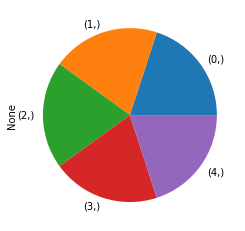

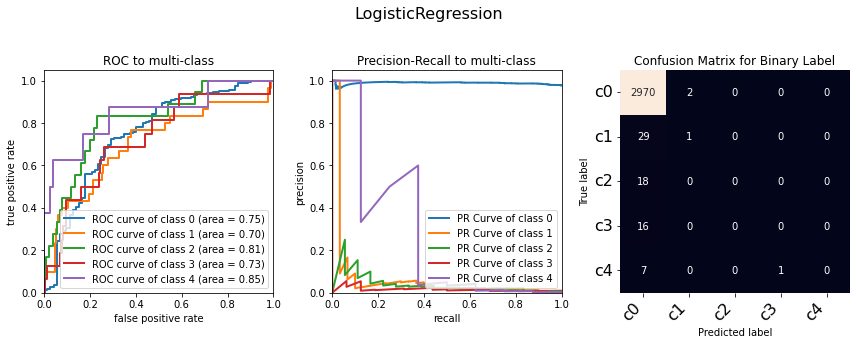

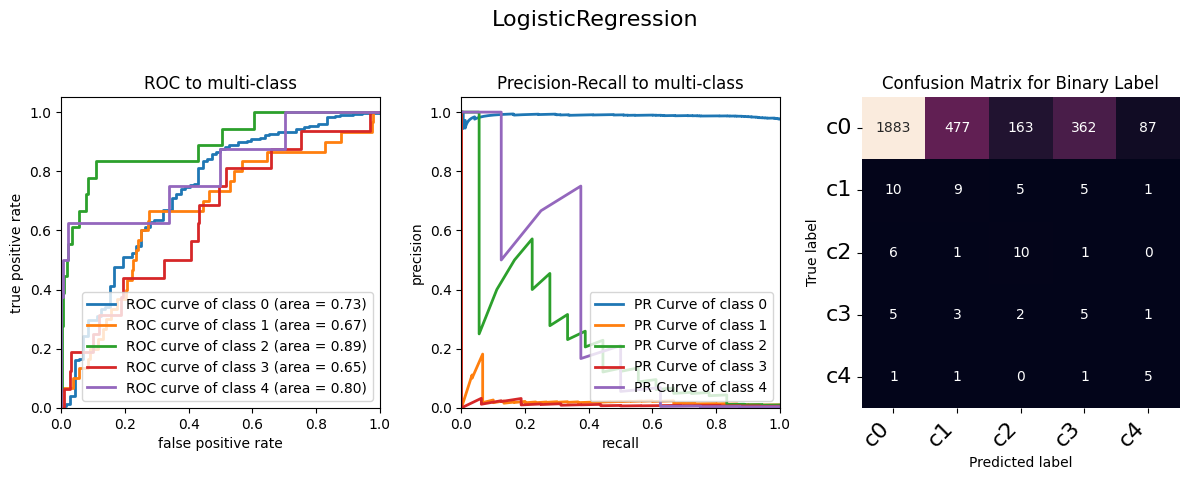

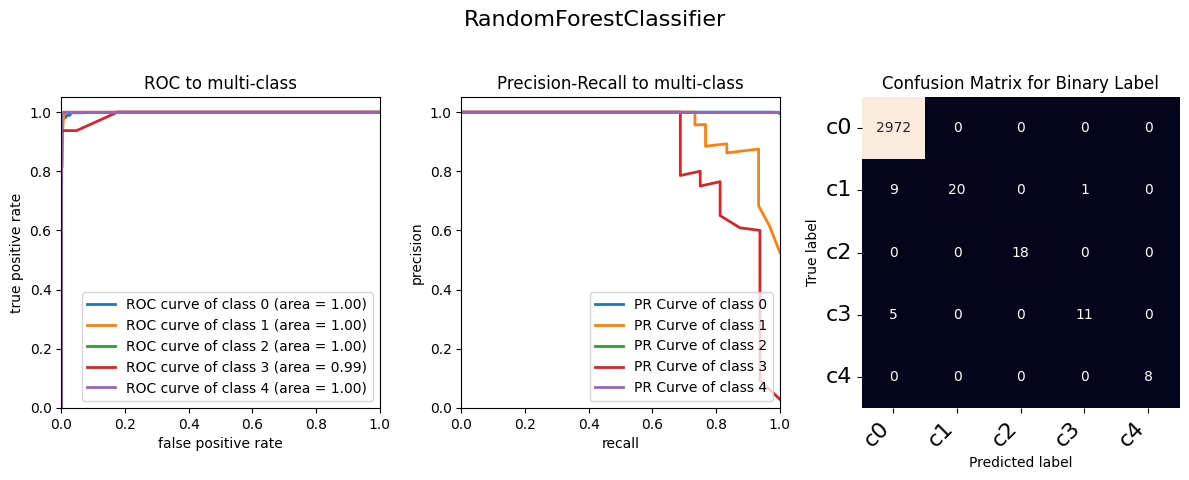

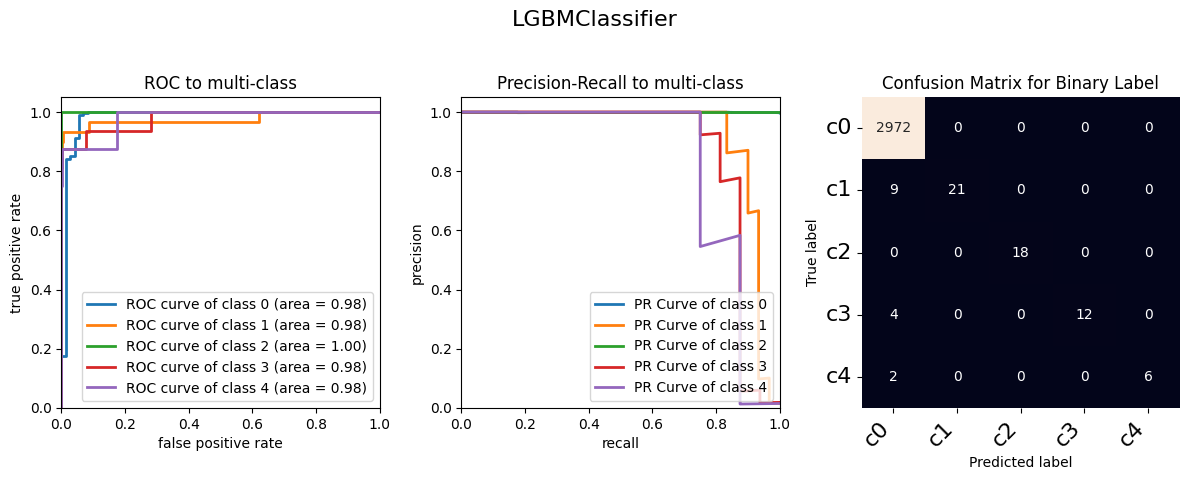

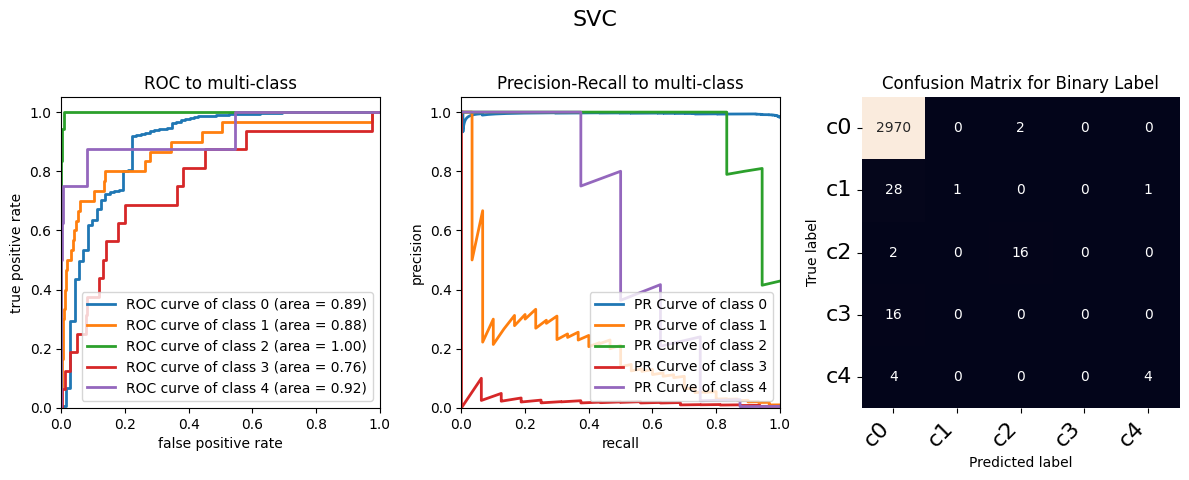

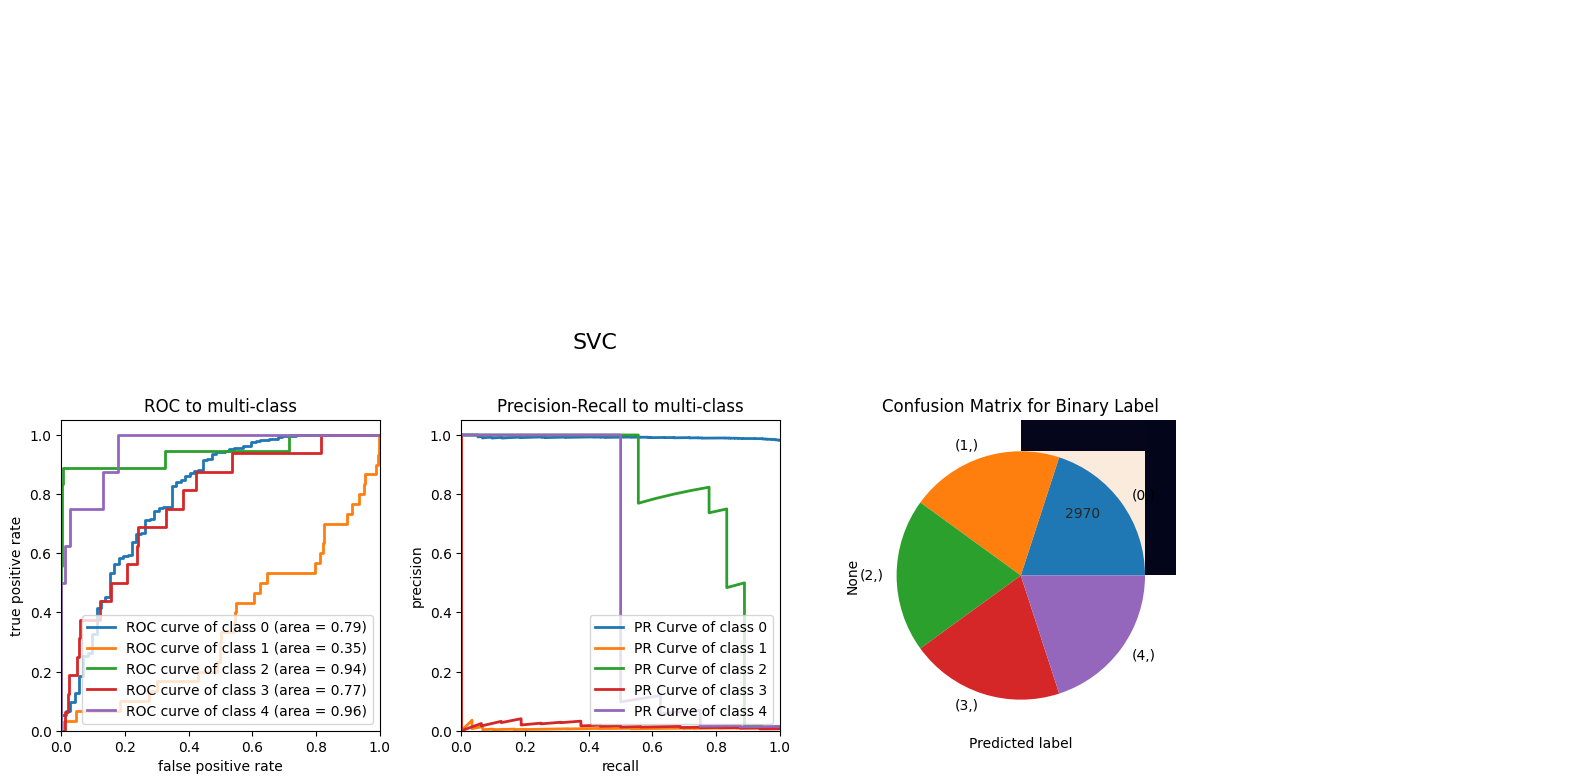

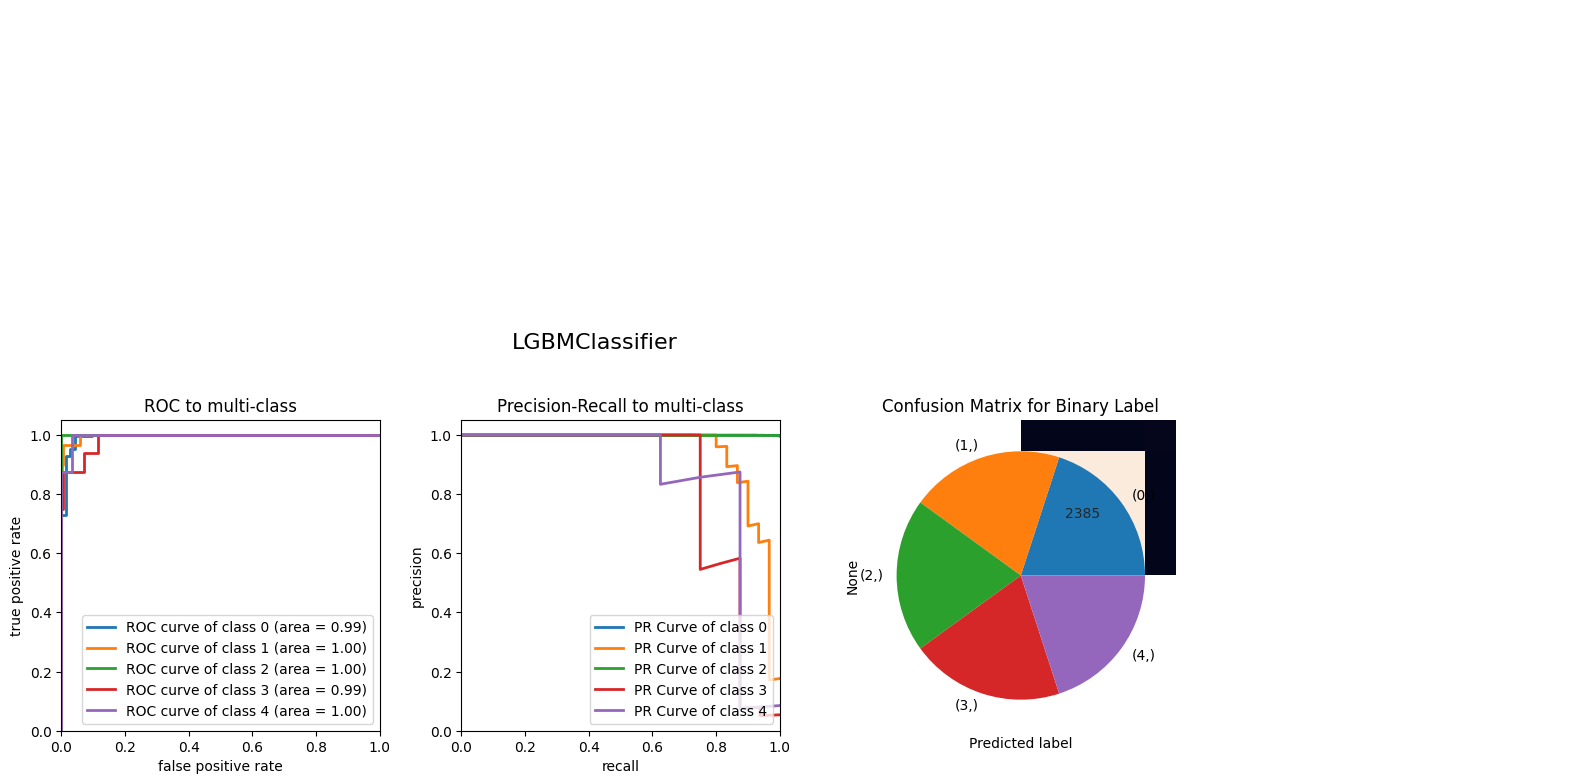

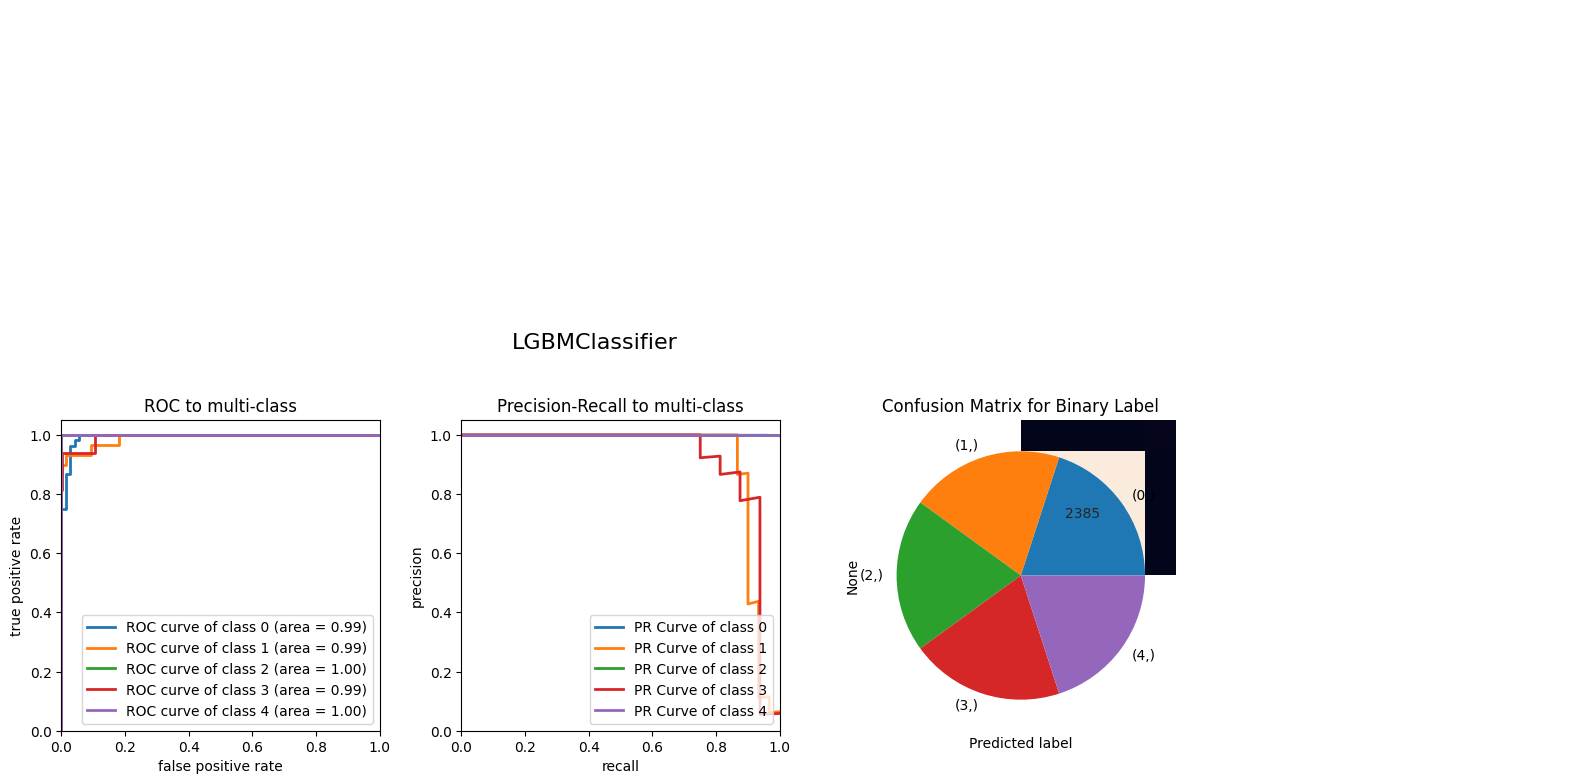

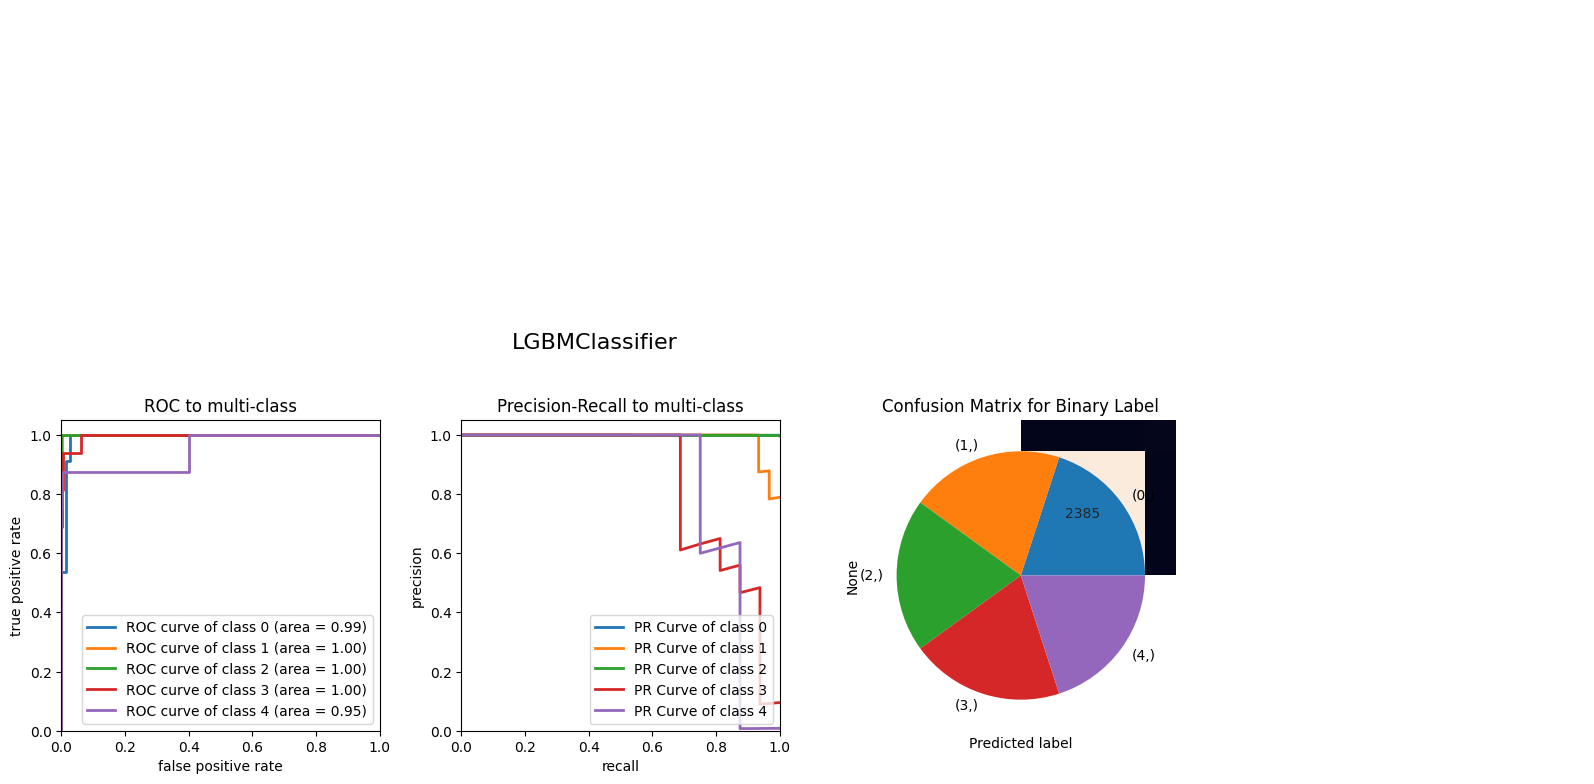

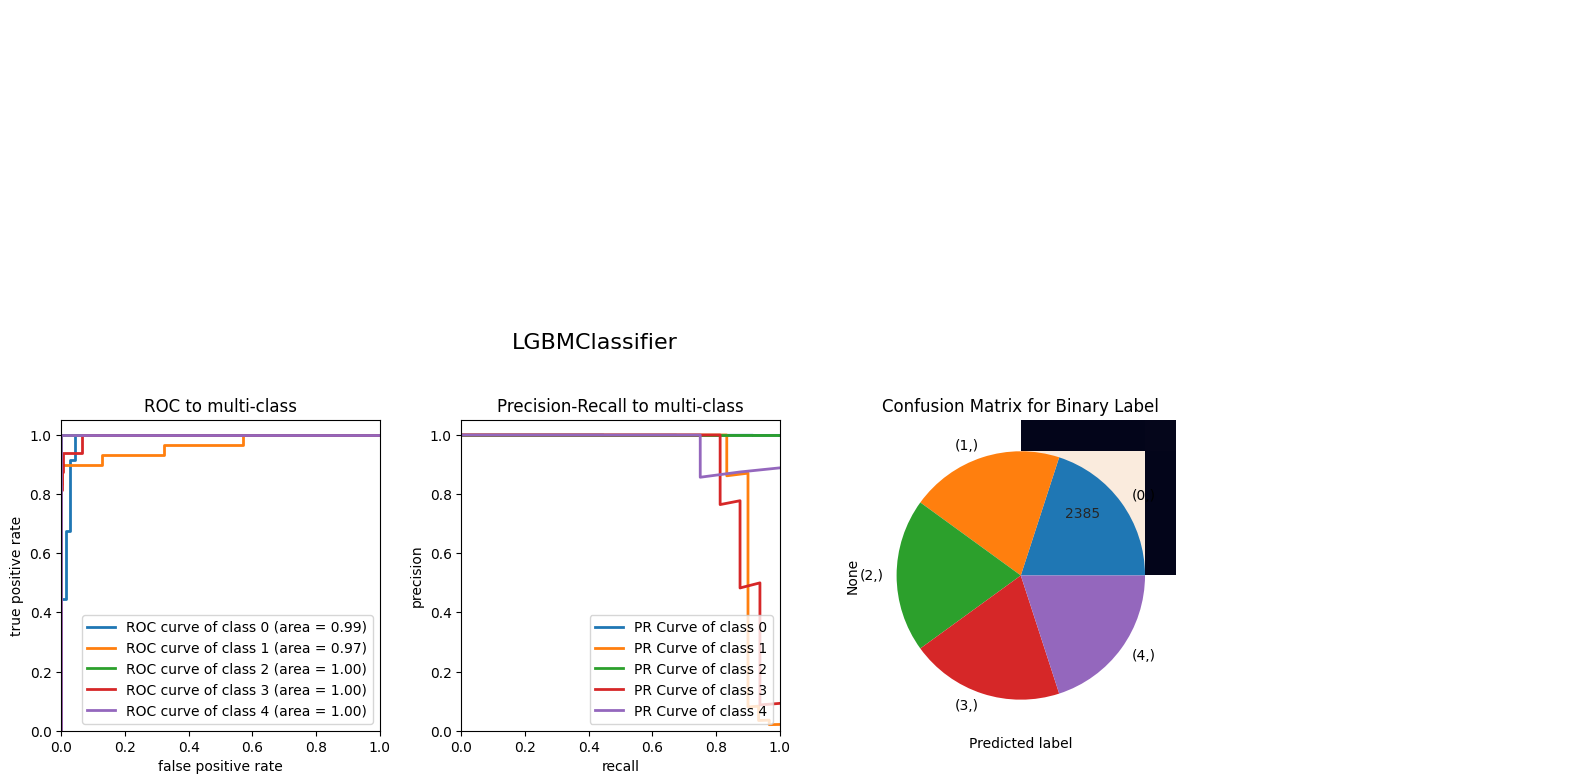

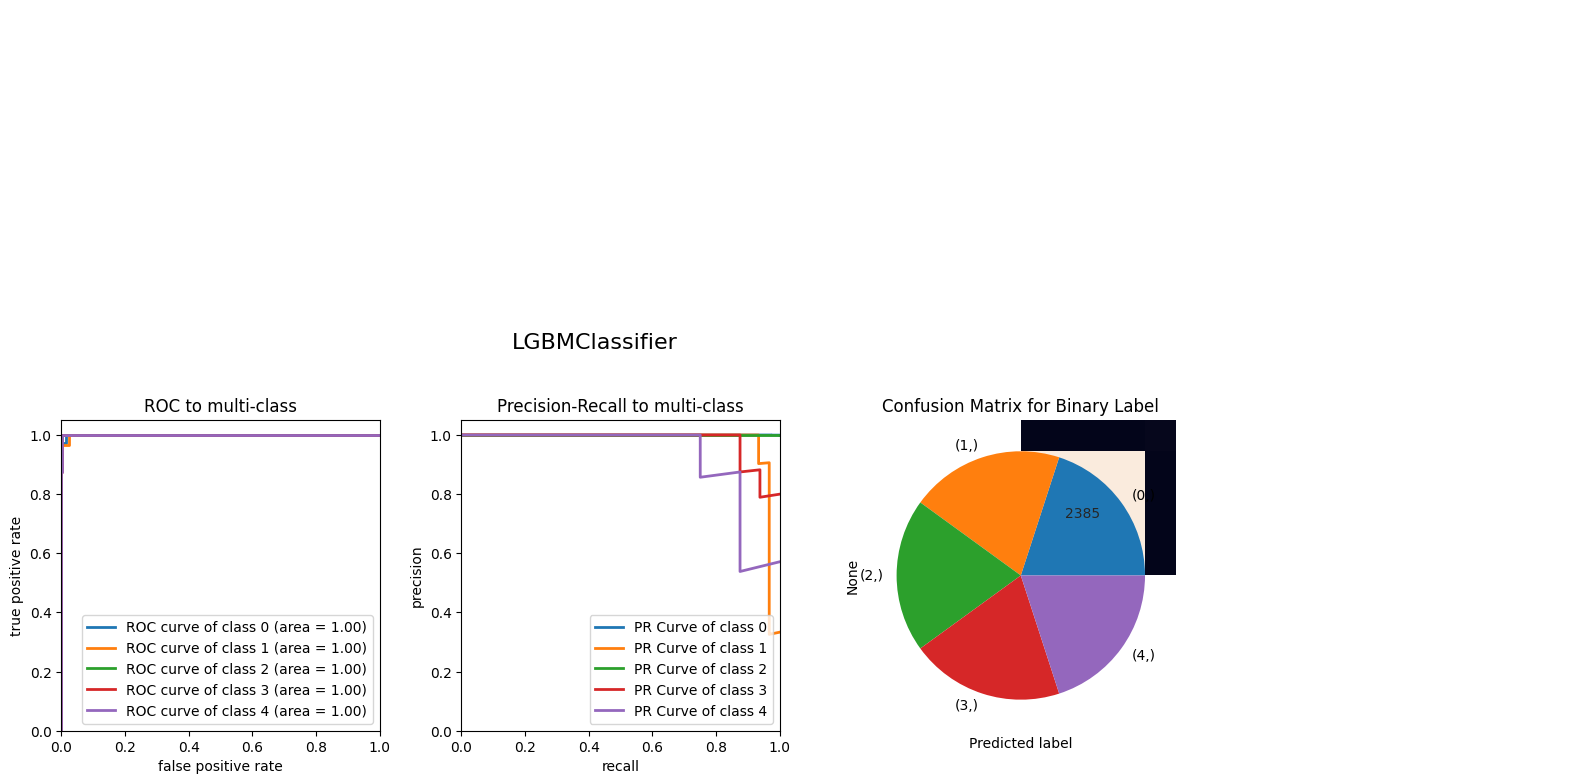

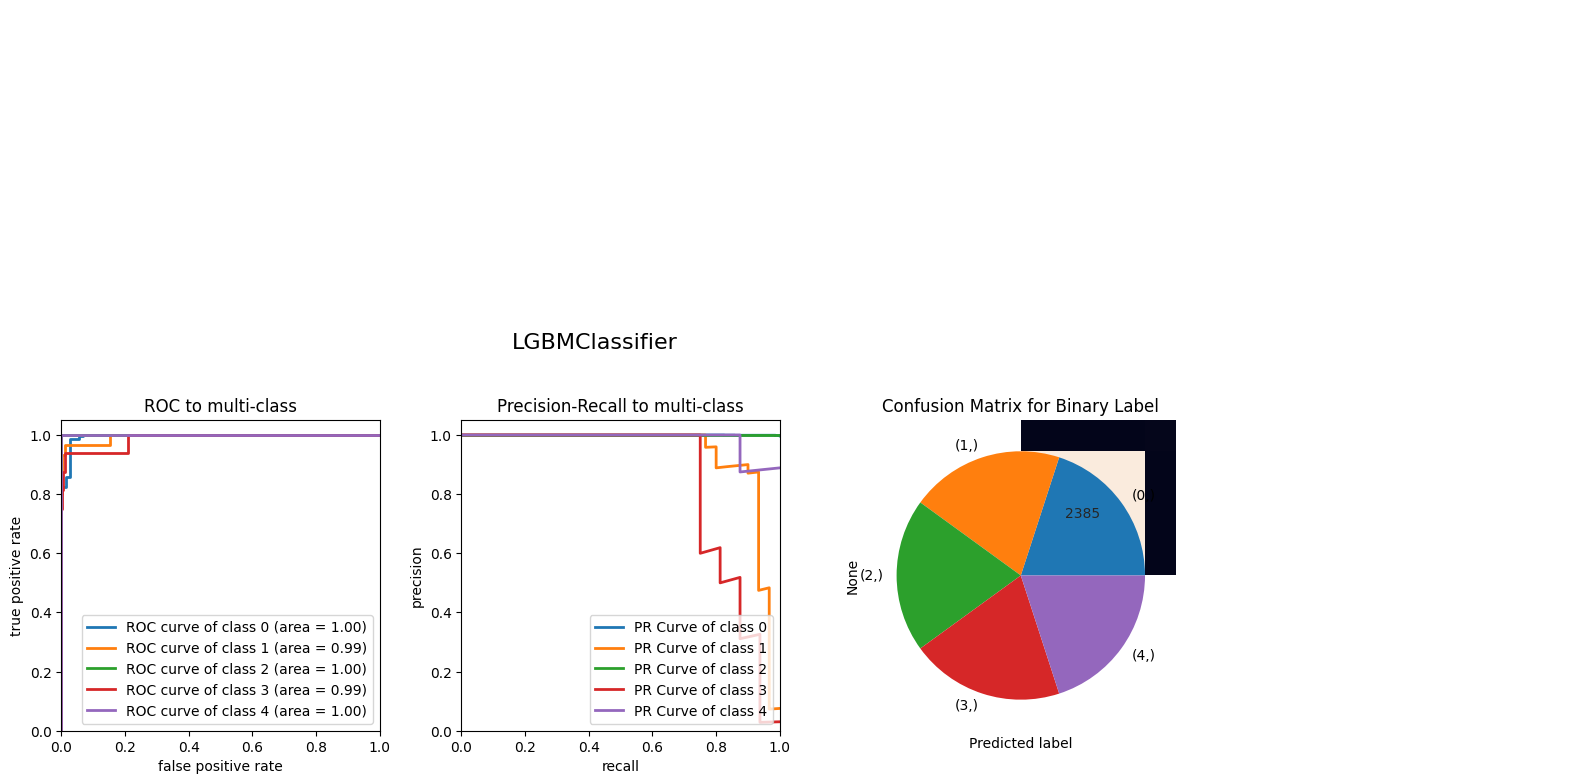

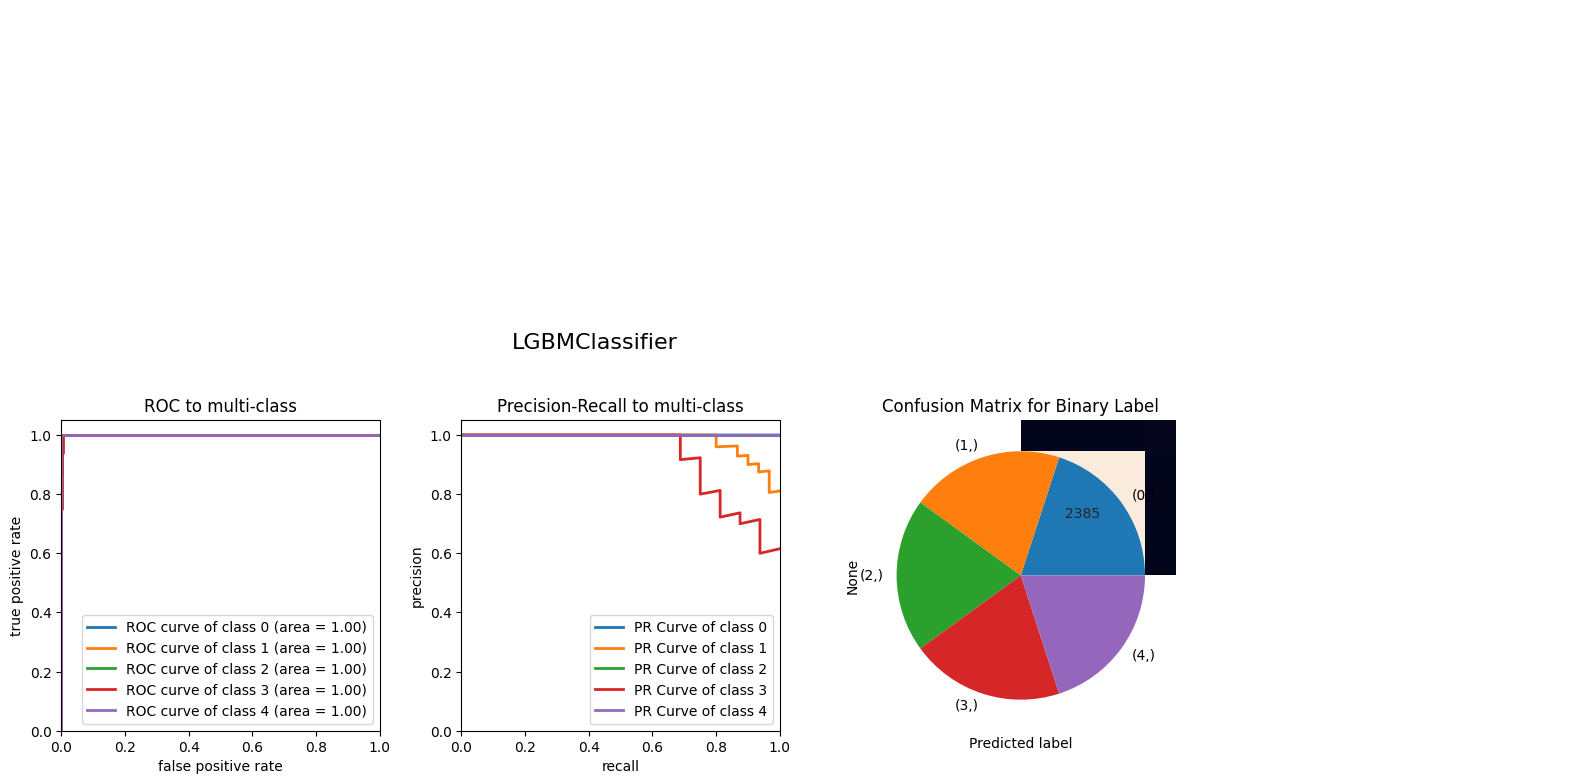

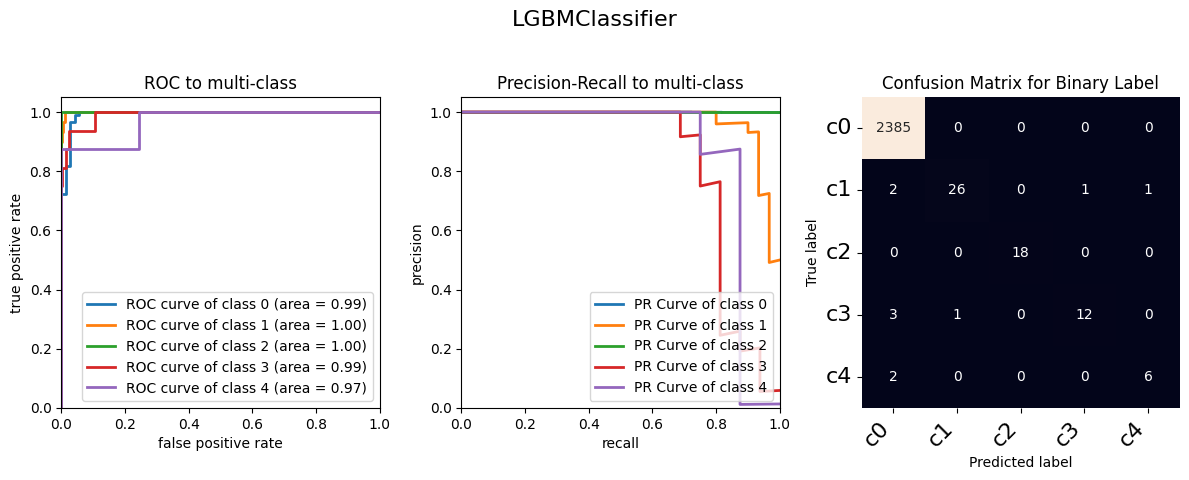

In [8]:
%matplotlib agg
%matplotlib inline
section_5 = "Model Results and Summary"
baseline_model_selection_macro = pd.read_csv("./results/baseline_model_selection_macro.csv")
baseline_model_selection_weighted = pd.read_csv("./results/baseline_model_selection_weighted.csv")
model_improvement_macro = pd.read_csv("./results/model_improvement_macro.csv")
model_finetuning_macro = pd.read_csv("./results/model_finetuning_macro.csv")

with accordions[section_5].children[0]:
    clear_output()
    display(Markdown('''<h3> Summary: </h3>'''))
    display(Markdown('''<ol>
        <li> Choice of metrics: F1-score for baseline models, Recall for best model</li> 
        <li> Choice of averaging technique for multi-class evaluation: 'Weighted' average</li> 
    </ol>
    '''))
        
    display(Markdown('''<h3> Justification for Choice of Metrics: </h3>'''))
    display(Markdown(''' In ML projects best practices, we start off by selecting the evaluation metrics and selection \
    criteria to decide on the best model. Here are some considerations: \
    <ol>
        <li> This is a classification problem, the evaluation metrics will be accuracy, precision, recall, f1-score, AUC for ROC or PR plots. </li>  
        <li> Due to the heavily imbalanced dataset, accuracy is not a good evaluation metrics as most likely we will get a very high accuracy \
        (models tend to predict well for majority class). </li> 
        <li> Between precision and recall, if the minority class are defects and the company requires zero-tolerance on \
        compliance, then recall is preferred over precision. Recall measures how well the minority class is correctly \
        classified i.e. quality, precision measures the percentage of minority class belongs to the group that is \
        correctly classified i.e. quantity. In most cases, we will look at both metrics to evaluate the effectiveness \
        of the model i.e. f1-score which is the harmonic mean of both precision and recall. </li> 
        <li> The strategy is first to build a baseline model based on loose/less strict evaluation metrics \
        i.e. f1-score/auc curve then when trying to get the best model, we focus on optimizing the model performance for recall.</li>  
        <li> Point to note: AUC curve in this case, might or might not be helpful due to the highly imbalances target class i.e. \
        similar to that of accuracy.</li>  
    </ol>
    '''))
         
    display(Markdown('''<h3> Justification for Choice of Averaging Technique:</h3>'''))
    display(Markdown(''' Due to the multi-class condition, the evaluation metrics will return different result for \
    different class, so here are some considerations: \
    <ol>
        <li> The grand average of the evaluation metrics can be computed by either 'macro', 'micro' or 'weighted'. 'Macro' \
        average is not preferred since it gives equal weights to the scores. </li>  
        <li> Between 'micro' and 'weighted', the selection is 'weighted' because it looks at the proportion of each classes over \
        the entire population. The way 'micro' calculates is such that micro-precision = micro-recall = micro-accuracy, which \
        we knew from the previous section, it will not be suited for a highly imbalanced dataset. </li>  
    </ol>
    '''))
 
    
with accordions[section_5].children[1]:
    clear_output()
    display(Markdown('''<h3> Modelling Strategy:</h3>'''))
    display(Markdown('''After selecting the evaluation metrics, we can get started to build our baseline model. \
    Here are the modelling strategy: \
    <ol>
        <li> Step 1: Hyperparameter tuning can only help to the extend of how good the data is. Considering the time \
        constraint, the focus would be to explore which model performs the best without any hyperparameter tuning and \
        without any data cleaning first (except missing data cleaning) </li> 
        <li> Step 2: Based on selected model, improve data by performing data cleaning (missing and outlier), feature \
        transformation, feature engineering and feature selection </li> 
        <li> Step 3: Perform hyperparameter tuning </li> 
        <li> Step 4: Preventative measures for overfitting/underfitting </li> 
        <li> Step 5: Selection of model and recommend way forward </li> 
    </ol>
    '''))
    
    display(Markdown('''<h3> Models to try: </h3>'''))
    display(Markdown('''<ol>
        <li> Logistic Regression Model </li> 
        <li> Tree-based Model: Bagging trees: Random Forest; Boosting trees: LightGBM Model </li> 
        <li> Support Vector Model </li> 
        <li> Dual-stage modelling i.e. Anomaly-based detection model: One-class SVM -> K-means clustering </li> 
        <li> Artificial Neural Nets </li> 
    </ol>
    '''))

with accordions[section_5].children[2]:
    clear_output()
    display(Markdown('''<h3> Baseline model selection: </h3>'''))
    display(Markdown('''<h4> Macro-average Results - Comparison Between Models: </h4>'''))
    display(baseline_model_selection_macro)
    display(Markdown('''<h4> Weight-average Results - Comparison Between Models: </h4>'''))
    display(baseline_model_selection_weighted)
    
    display(Markdown('''<h4> Observations/Interpretation: </h4>'''))
    display(Markdown('''<ol>
        <li> F1-score, Recall and Precision is the highest for LightGBM, followed by RBF SVC, Random Forest, Linear SVC,\
             Weighted and Non-Weight Logistic Regression. </li>
        <li> As mentioned in previous section, the evaluation metrics used will be the weighted-average scores. However, from \
             it seems that the weighted average scores are misleading. Will evaluate based on macro averages for now.  </li>
        <li> It's not surprising that LightGBM will perform well. Tree-based model especially boosting types tend to \
             overfit. This however, doesn't stop us from choosing LightGBM as there are techniques to prevent overfitting. </li>
        <li> Support vector methods comes second in recall and f1-score. How support vector works is it finds the \
             hyperplane that best separates (maximum distance) between two clusters of data points. Support vector techniques\
             are often used in anomaly detection models. However, recall is too low for us to move forward with it. 
        <li> Random forest would combat the issue of overfitting as compared to LightGBM, but the recall is too low \
             for us to move forward with it. </li>
    </ol>'''))

    display(Markdown('''<h4> Model Evaluation Plots - Comparison Between Models: </h4>'''))
    display(train.baseline_model(combined_df1, retrain=False))
    
    display(Markdown('''<h4> Next Course of Action: </h4>'''))
    display(Markdown('''Use LightGBM as baseline model and improve recall scores. '''))
    
with accordions[section_5].children[3]:
    clear_output()
    display(Markdown('''<h3> Model Fine Tuning and Final Selection: </h3>'''))
    display(Markdown('''<h4> Model Results - Comparison between Various Analytical Techniques : </h4>'''))
    display(model_improvement_macro)
    display(Markdown('''<h4> Model Evaluation Plots: </h3>'''))
    display(train.model_bysubsets(retrain=False))
    display(Markdown('''<h4> Model Results - Comparison between Various Model Fine Tuning Techniques : </h4>'''))
    display(model_finetuning_macro)
    display(Markdown('''<h4> Model Evaluation Plots: </h3>'''))
    display(train.model_tuning(combined_df4, retrain=False))
    
    display(Markdown('''<h4> Observations/Interpretation: </h4>'''))
    display(Markdown('''<ol>
        <li> Outlier removal, feature engineering and feature selection result in major improvement in recall scores. </li>
        <li> Oversampling results is worst off without oversampling. Perhaps EDA was done well rendering the oversampling \
             unnecessary? I would still keep the oversampling knowing that it will help the model to learn the behaviour \
             of the minorities better. </li>
        <li> L2 regularization yields better results than L1 regularization. L2 are best suited to identify complex \
             patterns as compared to L1, the former is also sensitive to outliers. For a dataset with many outliers, perhaps\
             this proves that the outlier removal was done well. </li>
    </ol>'''))
    

In [9]:
section_6 = "Conclusion"
final_df = pd.read_csv("./results/final_df.csv")

with accordions[section_6].children[0]:
    clear_output()
    display(Markdown('''<h4> The following is the final model selection and its corresponding parameters/configuration: </h4>'''))
    display(final_df)
    display(Markdown('''<h4> Observations/Interpretation: </h4>'''))
    display(Markdown('''<ol>
        <li> The final model selection is LightGBM due to achieving (>90%) macro-average recall. </li>
        <li> The choice of a tree-based boosting model as compared to other models is due to the heavily class imbalance\
             use case. The assumption here is we are able to accurately capture anomalies with known cause before hand. \
             If we are unable able to track the source of anomaly, then the choice would be to select one-class algorithms i.e. \
             One-class SVM and PCA-based anomaly detection instead of tree-based techniques.</li>
        <li> Model improvement is seen after performing outlier removal from majority class, feature engineering, feature
             transformation and feature selection. Although had to admit, feature transformation was performed poorly,\
             further improvement in data transformation should be done.</li>
        <li> Feature Engineering include PCA and flagging features: PCA was able to identify dimensions with maximum \
             variance that can clearly separate the minority classes from each other. Flagging the data points that exceed UCL and LCL limits \
             from the control charts also improves the model. The use of feature engineering coupled with feature
             selection is the key ingredient to this solution. </li>
        <li> Interestingly, oversampling did not do well as compared to that of without oversampling. This \
             could be attributed to the outlier removal, feature engineering and transformation performed in earlier \
             steps whereby oversampling becomes unnecessary. However, upon hyperparameter tuning, model trained\
             with oversampling technique is comparable to the result without oversampling. The former is still selected \
             as final model as we don't want to risk for an overfitted model that is not familiar with the behaviour of the \
             minorities. </li>
        <li> The use of bayesian optimization in hyperparameter tuning speeds up the parameter search time as compared to \
             grid search and randomized search. The time reduce was from ~5 hours down to ~1 hour. </li>
        <li> Since it's a tree-based model, it tends to overfit. Preventative measures to avoid overfitting include \
            hyperparameter tuning using 5-fold cross validation, feature selection using ANOVA and Chi2 techniques and \
            l2 regularization. Aware that 5-fold is a little low, as future recommendation, will perform 10-fold or \
            more cross validation folds.</li>
    </ol>'''))
            
with accordions[section_6].children[1]:
    clear_output()
    display(Markdown('''<h3> Way Forward/ Future Recommendation: </h3>'''))
    display(Markdown('''While performing the task, a list of product backlog is prepared and grouped into quick wins, momentum boulders, \
    derailer and transformational efforts for prioritization of efforts:'''))
            
    display(Markdown('''<h4> Quick Wins (Low effort, high impact): </h4>'''))
    display(Markdown('''<ol>
        <li> Further hyperparameter tuning of LightGBM model </li>
        <li> Improvement in data transformation techniques </li>
        <li> Build API for predictive model and deploy to cloud to allow for user's usage </li>
        <li> Collect data for validation purposes as preventative measure for overfitting </li>
    </ol>'''))
            
    display(Markdown('''<h4> Momentum Boulders (Low effort, low impact): </h4>'''))
    display(Markdown('''<ol>
        <li> Missing data imputation i.e. kNN vs. MICE </li>
        <li> Explore undersampling </li>
        <li> Sensitivity analysis on random state </li>
    </ol>'''))

    display(Markdown('''<h4> Derailers (High effort, low impact): </h4>'''))
    display(Markdown('''<ol>
        <li> Optimize code </li>
    </ol>'''))
            
    display(Markdown('''<h4> Transformational (High effort, high impact):  </h4>'''))
    display(Markdown(''' <ol>
        <li> Collect more representative data for the minority class </li>
        <li> Further statistical analysis on data </li>
        <li> Sensitivity analysis on random state </li>
        <li> Develop neural nets model  </li>
    </ol>'''))



In [10]:
from ipywidgets.embed import embed_minimal_html
embed_minimal_html('Technical_Assessment_Grace.html', views=[widget_fields], title='Multiclass_Classification')